In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, calinski_harabasz_score


In [90]:
import sys
print("Python version:")
print (sys.version)
print (sys.platform)

Python version:
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
win32


In [2]:
# importing data frame
obesity = pd.read_csv("C://Users//sophi//OneDrive//University//Big Data Fundamentals//Assignments//obesity.csv")

In [3]:
# exploring structure of data frame
obesity.shape

(2111, 17)

In [4]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
# checking data points
obesity.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [6]:
# checking for missing data - confirms data description 
obesity.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [7]:
# summary statistics of numerical 
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


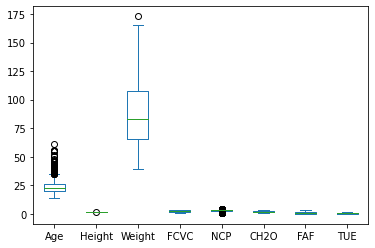

In [8]:
# inspecting numerical data - can keep this in mind for scaling before modeling and outliers
obesity.plot(kind='box')
plt.show()

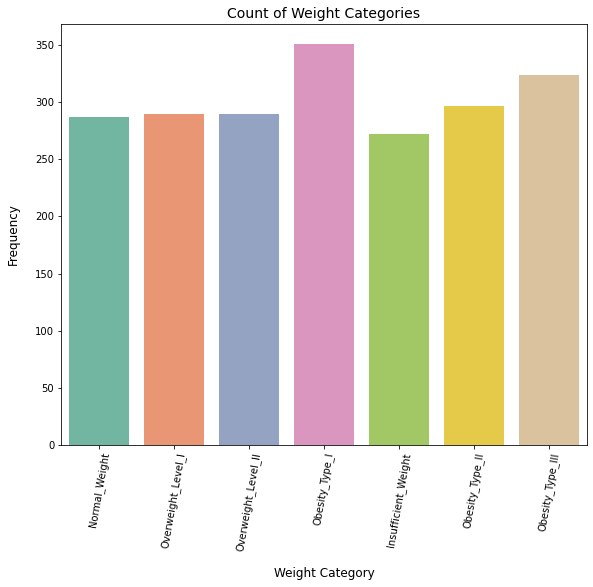

In [9]:
# figure to check the counts of categories
plt.figure(figsize=(32, 8))

plt.subplot(1, 3, 1)
sns.countplot(x='NObeyesdad', data=obesity, palette='Set2')
plt.xticks(rotation=80)
plt.xlabel('Weight Category', labelpad=15, fontsize=12)
plt.ylabel('Frequency', labelpad=15, fontsize=12)
plt.title('Count of Weight Categories', fontsize=14)
plt.subplots_adjust(bottom=0.15)


folder_path = 'C:/Users/sophi/OneDrive/University/Big Data Fundamentals/Assignments/Figures/'

plt.savefig(f'{folder_path}count_of_weight_cats.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')
plt.show()


<Figure size 4608x1152 with 0 Axes>

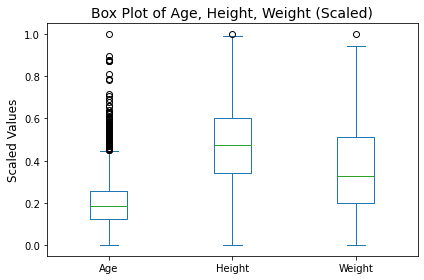

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058
std,6.345968,0.093305,26.191172
min,14.000000,1.450000,39.000000
25%,19.947192,1.630000,65.473343
50%,22.777890,1.700499,83.000000
75%,26.000000,1.768464,107.430682
max,61.000000,1.980000,173.000000


In [10]:
scaler = MinMaxScaler()

# checking demographical data spread to see how well each category is represented
demograph_box = obesity[['Age', 'Height', 'Weight']]
db_scaled_data = scaler.fit_transform(demograph_box)

scaled_db = pd.DataFrame(db_scaled_data, columns=['Age', 'Height', 'Weight'])

plt.figure(figsize=(64, 16))
scaled_db.plot(kind='box')

plt.title('Box Plot of Age, Height, Weight (Scaled)', fontsize=14)
plt.ylabel('Scaled Values', fontsize=12)

plt.savefig(f'{folder_path}demograph_box.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

demograph_box.describe()

In [11]:
# splitting data into a lifestlye habits dataset and an eating habits dataset
eating_hab = obesity.iloc[: , [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 16]]
lifestyle = obesity.iloc[: , [0, 1, 2, 3, 4, 9, 11, 12, 13, 15, 16]]

In [12]:
# checking each data set has correct columns
check = [eating_hab.columns, lifestyle.columns, obesity.columns]

for x in check:
    print(x)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC', 'NObeyesdad'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'SMOKE', 'SCC', 'FAF', 'TUE', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


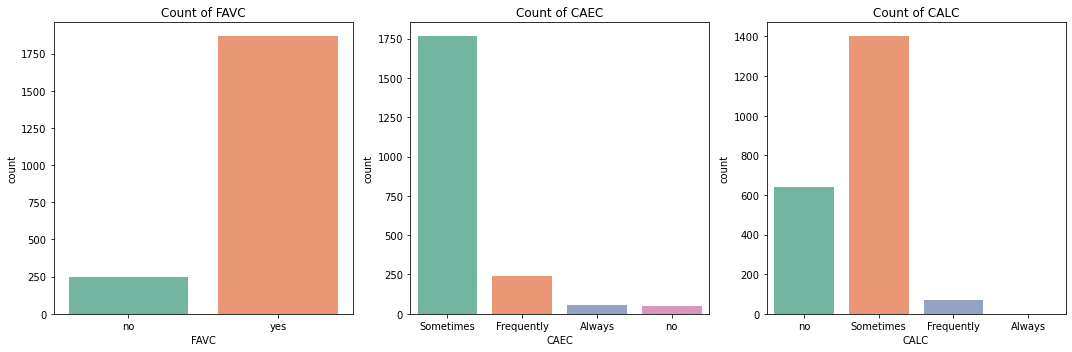

In [13]:
# plotting categorical variable counts for eating habits
plt.figure(figsize=(15, 5))

# Plot for 'FAVC' variable
plt.subplot(1, 3, 1)
sns.countplot(x='FAVC', data=eating_hab, palette='Set2')
plt.title('Count of FAVC')

# Plot for 'CAEC' variable
plt.subplot(1, 3, 2)
sns.countplot(x='CAEC', data=eating_hab, palette='Set2')
plt.title('Count of CAEC')

# Plot for 'CALC' variable
plt.subplot(1, 3, 3)
sns.countplot(x='CALC', data=eating_hab, palette='Set2')
plt.title('Count of CALC')

plt.savefig(f'{folder_path}eating_hab_cat_count.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [14]:
# summary statistics for categorical variables for eating habits
favc_counts = eating_hab['FAVC'].value_counts()
favc_percentages = eating_hab['FAVC'].value_counts(normalize=True) * 100

print("FAVC Frequencies and Percentages:")
for category, count in favc_counts.items():
    print(f"{category}: Frequency = {count}, Percentage = {favc_percentages[category]:.2f}%")

# Calculate and display the frequencies and percentages for 'CAEC'
caec_counts = eating_hab['CAEC'].value_counts()
caec_percentages = eating_hab['CAEC'].value_counts(normalize=True) * 100

print("\nCAEC Frequencies and Percentages:")
for category, count in caec_counts.items():
    print(f"{category}: Frequency = {count}, Percentage = {caec_percentages[category]:.2f}%")

# Calculate and display the frequencies and percentages for 'CALC'
calc_counts = eating_hab['CALC'].value_counts()
calc_percentages = eating_hab['CALC'].value_counts(normalize=True) * 100

print("\nCALC Frequencies and Percentages:")
for category, count in calc_counts.items():
    print(f"{category}: Frequency = {count}, Percentage = {calc_percentages[category]:.2f}%")


FAVC Frequencies and Percentages:
yes: Frequency = 1866, Percentage = 88.39%
no: Frequency = 245, Percentage = 11.61%

CAEC Frequencies and Percentages:
Sometimes: Frequency = 1765, Percentage = 83.61%
Frequently: Frequency = 242, Percentage = 11.46%
Always: Frequency = 53, Percentage = 2.51%
no: Frequency = 51, Percentage = 2.42%

CALC Frequencies and Percentages:
Sometimes: Frequency = 1401, Percentage = 66.37%
no: Frequency = 639, Percentage = 30.27%
Frequently: Frequency = 70, Percentage = 3.32%
Always: Frequency = 1, Percentage = 0.05%


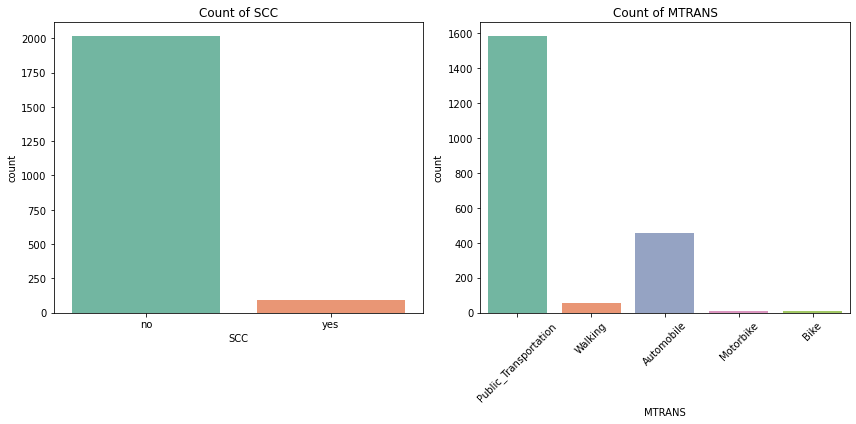

In [15]:
# plotting categorical variable counts for lifestyle
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='SCC', data=lifestyle, palette='Set2')
plt.title('Count of SCC')

plt.subplot(1, 2, 2)
sns.countplot(x='MTRANS', data=lifestyle, palette='Set2')
plt.xticks(rotation=45)
plt.title('Count of MTRANS')

plt.savefig(f'{folder_path}lifestyle_hab_cat_count.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [16]:
# summary statistics for categorical variables in lifestyle
scc_counts = lifestyle['SCC'].value_counts()
scc_percentages = lifestyle['SCC'].value_counts(normalize=True) * 100

print("\nSCC Frequencies and Percentages:")
for category, count in scc_counts.items():
    print(f"{category}: Frequency = {count}, Percentage = {scc_percentages[category]:.2f}%")


mtrans_counts = lifestyle['MTRANS'].value_counts()
mtrans_percentages = lifestyle['MTRANS'].value_counts(normalize=True) * 100

print("\nMTRANS Frequencies and Percentages:")
for category, count in mtrans_counts.items():
    print(f"{category}: Frequency = {count}, Percentage = {mtrans_percentages[category]:.2f}%")



SCC Frequencies and Percentages:
no: Frequency = 2015, Percentage = 95.45%
yes: Frequency = 96, Percentage = 4.55%

MTRANS Frequencies and Percentages:
Public_Transportation: Frequency = 1580, Percentage = 74.85%
Automobile: Frequency = 457, Percentage = 21.65%
Walking: Frequency = 56, Percentage = 2.65%
Motorbike: Frequency = 11, Percentage = 0.52%
Bike: Frequency = 7, Percentage = 0.33%


<Figure size 720x432 with 0 Axes>

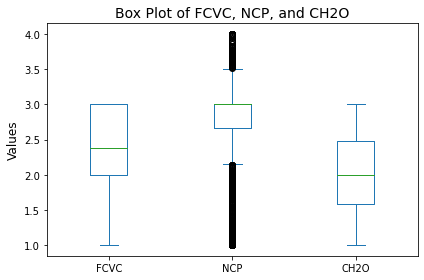

,FCVC,NCP,CH2O
count,2111.000000,2111.000000,2111.000000
mean,2.419043,2.685628,2.008011
std,0.533927,0.778039,0.612953
min,1.000000,1.000000,1.000000
25%,2.000000,2.658738,1.584812
50%,2.385502,3.000000,2.000000
75%,3.000000,3.000000,2.477420
max,3.000000,4.000000,3.000000


In [17]:
# box plot of numerical variables in eating habits
eating_hab_box = eating_hab[['FCVC', 'NCP', 'CH2O']]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the box plot using Pandas' plot function
eating_hab_box.plot(kind='box')

# Add title and labels
plt.title('Box Plot of FCVC, NCP, and CH2O', fontsize=14)
plt.ylabel('Values', fontsize=12)

plt.savefig(f'{folder_path}eating_hab_numeric_box.jpeg', format='jpeg', pil_kwargs={'quality': 95}, bbox_inches='tight')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

eating_hab_box.describe()

In [18]:
# as the box plot looks slightly strange, we are checking to see if these variables are actually categorical?
fcvc_unique_values = eating_hab['FCVC'].unique()
print("Unique values in 'FCVC':")
print(fcvc_unique_values)

ncp_unique_values = eating_hab['NCP'].unique()
print("\nUnique values in 'NCP':")
print(ncp_unique_values)

ch2o_unique_values = eating_hab['CH2O'].unique()
print("\nUnique values in 'CH2O':")
print(ch2o_unique_values)

Unique values in 'FCVC':
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.594653 2.886157 2.967853 2.619835 1.053534 2.530233
 2.8813   2.824559 2.762325 2.070964 2.68601  2.794197 2.720701 2.880792
 2.674431 2.55996  1.212908 1.140615 2.562409 2.004146 2.690754 2.051283
 2.19005  2.21498  2.91548  2.

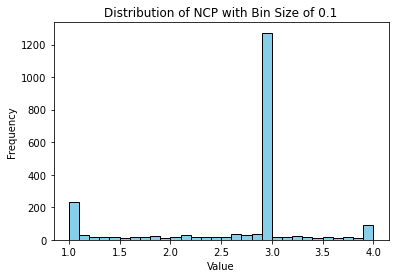

In [19]:
# what's going on with NCP, shall we remove these outliers later on in the process?
bin_size = 0.1

bins = np.arange(obesity['NCP'].min(), obesity['NCP'].max() + bin_size, bin_size)

obesity['NCP'].plot(kind='hist', bins=bins, color='skyblue', edgecolor='black')

plt.title(f'Distribution of {obesity["NCP"].name} with Bin Size of {bin_size}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

<Figure size 720x432 with 0 Axes>

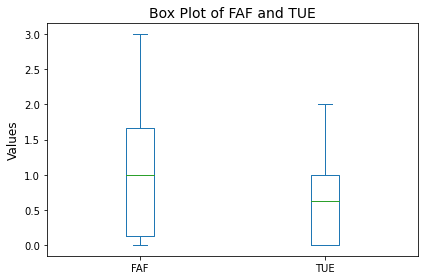

,FAF,TUE
count,2111.000000,2111.000000
mean,1.010298,0.657866
std,0.850592,0.608927
min,0.000000,0.000000
25%,0.124505,0.000000
50%,1.000000,0.625350
75%,1.666678,1.000000
max,3.000000,2.000000


In [20]:
# box plot of lifestyle numerical variables
lifestyle_box = lifestyle[['FAF', 'TUE']]

plt.figure(figsize=(10, 6))


lifestyle_box.plot(kind='box')


plt.title('Box Plot of FAF and TUE', fontsize=14)
plt.ylabel('Values', fontsize=12)

plt.savefig(f'{folder_path}lifestyle_numeric_box.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

lifestyle_box.describe()

In [21]:
# checking again they are actually categorical?
faf_unique_values = lifestyle['FAF'].unique()
print("\nUnique values in 'FAF':")
print(faf_unique_values)

tue_unique_values = lifestyle['TUE'].unique()
print("\nUnique values in 'TUE':")
print(tue_unique_values)


Unique values in 'FAF':
[0.       3.       2.       ... 1.414209 1.139107 1.026452]

Unique values in 'TUE':
[1.       0.       2.       ... 0.646288 0.586035 0.714137]


In [22]:
# checking which unique values are in categorical ordinal columns to label code in correct order
for column in eating_hab.columns:
    if eating_hab[column].dtype == 'object':
        print(f"Unique values in column '{column}': {eating_hab[column].unique()}")

Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'family_history_with_overweight': ['yes' 'no']
Unique values in column 'FAVC': ['no' 'yes']
Unique values in column 'CAEC': ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in column 'CALC': ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in column 'NObeyesdad': ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [23]:
# turning categorical data into numerical coded data, ensuring ordered variables are numerically ordered
le = preprocessing.LabelEncoder()

eating_hab = eating_hab.copy()

CAEC_order = ['no', 'Sometimes', 'Frequently', 'Always']

CALC_order = ['no', 'Sometimes', 'Frequently', 'Always']

NObeyesdad_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

for column in eating_hab.columns:
    if eating_hab[column].dtype == 'object':
        
        if column == 'CAEC':
            eating_hab[column] = pd.Categorical(eating_hab[column], categories=CAEC_order, ordered=True)
            eating_hab[column] = eating_hab[column].cat.codes
        
        elif column == 'CALC':
            eating_hab[column] = pd.Categorical(eating_hab[column], categories=CALC_order, ordered=True)
            eating_hab[column] = eating_hab[column].cat.codes
            
        elif column == 'NObeyesdad':
            eating_hab[column] = pd.Categorical(eating_hab[column], categories=NObeyesdad_order, ordered=True)
            eating_hab[column] = eating_hab[column].cat.codes
        
        else:
            eating_hab[column] = le.fit_transform(eating_hab[column])
        
eating_hab.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,CALC,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,2.0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,2.0,2,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,2.0,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,2.0,1,3
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1,2.0,1,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1,2.0,1,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1,2.0,1,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1,2.0,2,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1,2.0,0,1


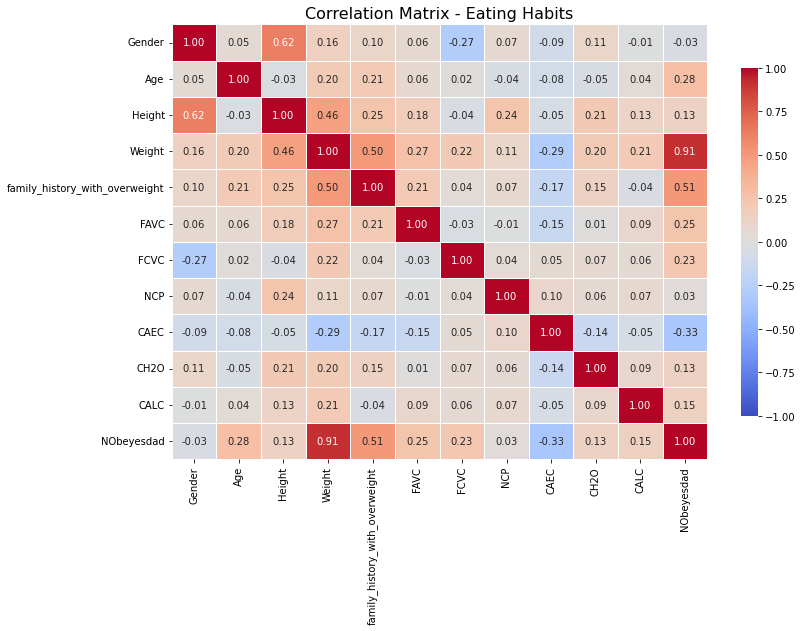

In [24]:
# correlation heatmap of eating habits variables
eh_corr = eating_hab.corr()

plt.figure(figsize=(12, 8))


sns.heatmap(eh_corr, 
            annot=True,          
            cmap='coolwarm',       
            fmt='.2f',      
            linewidths=0.5,      
            cbar_kws={'shrink': 0.8},  
            annot_kws={"size": 10},    
            vmin=-1, vmax=1)       

plt.title('Correlation Matrix - Eating Habits', fontsize=16)
plt.savefig(f'{folder_path}eating_hab_corr.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')
plt.show()

In [25]:
# double checking which lifestyle columns are categorical ordinal
for column in lifestyle.columns:
    if lifestyle[column].dtype == 'object':
        print(f"Unique values in column '{column}': {lifestyle[column].unique()}")

Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'family_history_with_overweight': ['yes' 'no']
Unique values in column 'SMOKE': ['no' 'yes']
Unique values in column 'SCC': ['no' 'yes']
Unique values in column 'MTRANS': ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values in column 'NObeyesdad': ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [26]:
# turning categorical data into numerically coded data for lifestyle
label_encoder = LabelEncoder()

binary_nominal_cols = ['Gender', 'family_history_with_overweight', 'SMOKE', 'SCC']

for col in binary_nominal_cols:
    lifestyle[col] = label_encoder.fit_transform(lifestyle[col])

mtrans_onehot = pd.get_dummies(lifestyle['MTRANS'], prefix='MTRANS')
lifestyle = pd.concat([lifestyle, mtrans_onehot], axis=1)
lifestyle.drop('MTRANS', axis=1, inplace=True)

ordinal_encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])

lifestyle['NObeyesdad'] = ordinal_encoder.fit_transform(lifestyle[['NObeyesdad']])

lifestyle.head(15)

C:\Users\sophi\AppData\Local\Temp/ipykernel_18272/4137929063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifestyle[col] = label_encoder.fit_transform(lifestyle[col])


,Gender,Age,Height,Weight,family_history_with_overweight,SMOKE,SCC,FAF,TUE,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,0,0.0,1.0,1.0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,1,1,3.0,0.0,1.0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,0,2.0,1.0,1.0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,0,2.0,0.0,2.0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,0,0.0,0.0,3.0,0,0,0,1,0
5,1,29.0,1.62,53.0,0,0,0,0.0,0.0,1.0,1,0,0,0,0
6,0,23.0,1.50,55.0,1,0,0,1.0,0.0,1.0,0,0,1,0,0
7,1,22.0,1.64,53.0,0,0,0,3.0,0.0,1.0,0,0,0,1,0
8,1,24.0,1.78,64.0,1,0,0,1.0,1.0,1.0,0,0,0,1,0
9,1,22.0,1.72,68.0,1,0,0,1.0,1.0,1.0,0,0,0,1,0


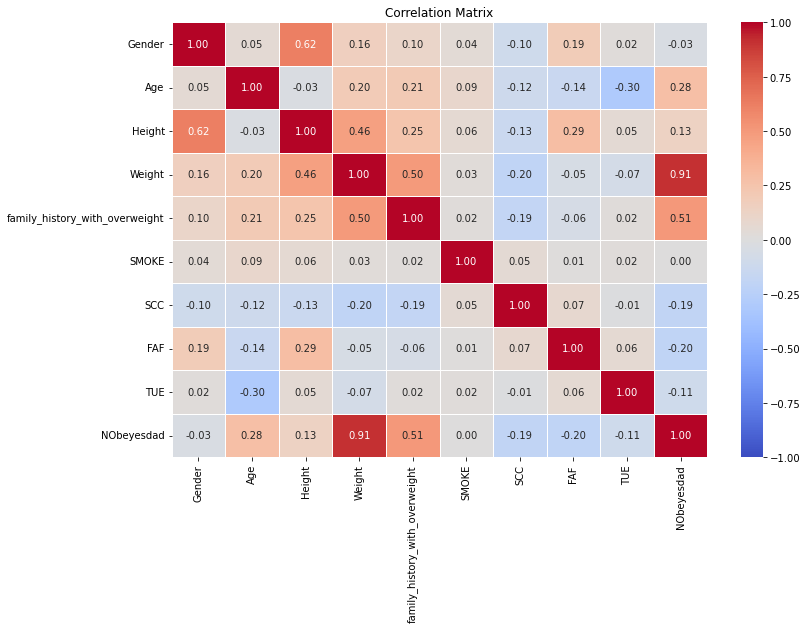

In [27]:
# correlation heat map for lifestyle without MTRANS
columns_to_drop = [col for col in lifestyle.columns if 'MTRANS' in col]
lifestyle_for_corr = lifestyle.drop(columns=columns_to_drop)


correlation_matrix = lifestyle_for_corr.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')

plt.savefig(f'{folder_path}lifestyle_corr.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()

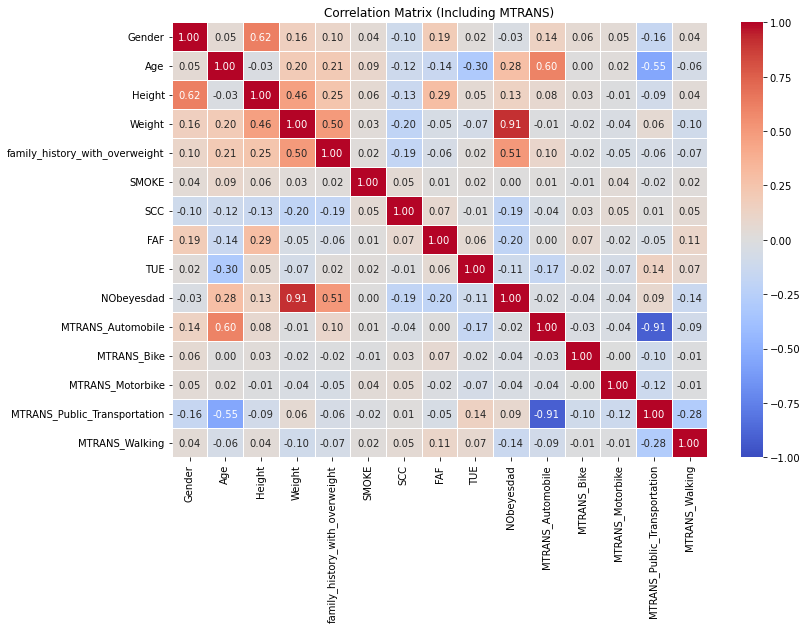

In [31]:
# correlation heatmap for lifestyle 
correlation_matrix = lifestyle.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix (Including MTRANS)')

plt.savefig(f'{folder_path}lifestyle_corr_2.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()

In [29]:
# scaling and removing outliers for eating habits
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

cols_with_outliers = ['Height', 'Weight'] 
eating_hab_cleaned = remove_outliers(eating_hab, cols_with_outliers)


minmaxscaler = MinMaxScaler()

cols_to_scale = ['Height', 'Weight', 'Age', 'FCVC', 'NCP', 'CH2O']

eating_hab_scaled = eating_hab_cleaned.copy()
eating_hab_scaled[cols_to_scale] = minmaxscaler.fit_transform(eating_hab_scaled[cols_to_scale])

print(eating_hab_scaled.head())

   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.148936  0.323401  0.198323                               1     0   
1       0  0.148936  0.133165  0.134859                               1     0   
2       1  0.191489  0.665826  0.301450                               1     0   
3       1  0.276596  0.665826  0.380779                               0     0   
4       1  0.170213  0.627779  0.402991                               0     0   

   FCVC       NCP  CAEC  CH2O  CALC  NObeyesdad  
0   0.5  0.666667     1   0.5     0           1  
1   1.0  0.666667     1   1.0     1           1  
2   0.5  0.666667     1   0.5     2           1  
3   1.0  0.666667     1   0.5     2           2  
4   0.5  0.000000     1   0.5     1           3  


In [30]:
# scaling and removing outliers for lifestyle habits
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


cols_with_outliers = ['Height', 'Weight']
lifestyle_cleaned = remove_outliers(lifestyle, cols_with_outliers)

cols_to_scale = ['Height', 'Weight', 'Age', 'FAF', 'TUE']

lifestyle_scaled = lifestyle_cleaned.copy()
lifestyle_scaled[cols_to_scale] = minmaxscaler.fit_transform(lifestyle_scaled[cols_to_scale])

print(lifestyle_scaled.head())

   Gender       Age    Height    Weight  family_history_with_overweight  \
0       0  0.148936  0.323401  0.198323                               1   
1       0  0.148936  0.133165  0.134859                               1   
2       1  0.191489  0.665826  0.301450                               1   
3       1  0.276596  0.665826  0.380779                               0   
4       1  0.170213  0.627779  0.402991                               0   

   SMOKE  SCC       FAF  TUE  NObeyesdad  MTRANS_Automobile  MTRANS_Bike  \
0      0    0  0.000000  0.5         1.0                  0            0   
1      1    1  1.000000  0.0         1.0                  0            0   
2      0    0  0.666667  0.5         1.0                  0            0   
3      0    0  0.666667  0.0         2.0                  0            0   
4      0    0  0.000000  0.0         3.0                  0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                 0     

In [32]:
# creating a seperate unsupervised modelling data set, removing obesity category and rounding numerical continuous values in dataframe to two decimal places
unsup_eating_hab = eating_hab.drop(columns=['NObeyesdad'])

unsup_eating_hab[['Age', 'Height', 'NCP', 'Weight']] = unsup_eating_hab[['Age', 'Height', 'NCP', 'Weight']].round(2)

unsup_eating_hab.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,CALC
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,2.0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,2.0,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,2.0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,2.0,1


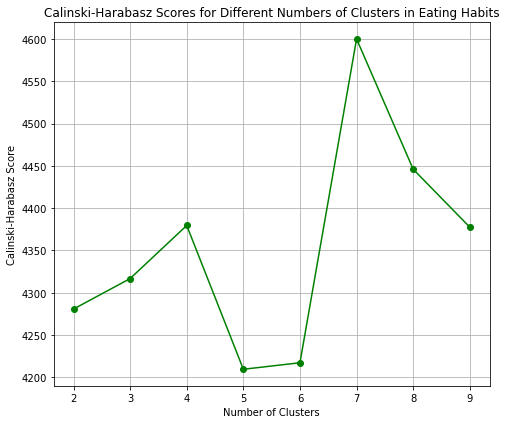

In [80]:
# checking best calinski-harabasz score
calinski_scores_eh = []

for n_clusters in range(2, 10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(unsup_eating_hab)
    ch_score = calinski_harabasz_score(unsup_eating_hab, cluster_labels)
    calinski_scores_eh.append(ch_score)

fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(range(2, 10), calinski_scores_eh, marker='o', color='g')
ax.set_title('Calinski-Harabasz Scores for Different Numbers of Clusters in Eating Habits')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Calinski-Harabasz Score')
ax.grid(True)

plt.savefig(f'{folder_path}eating_hab_ch_score.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()


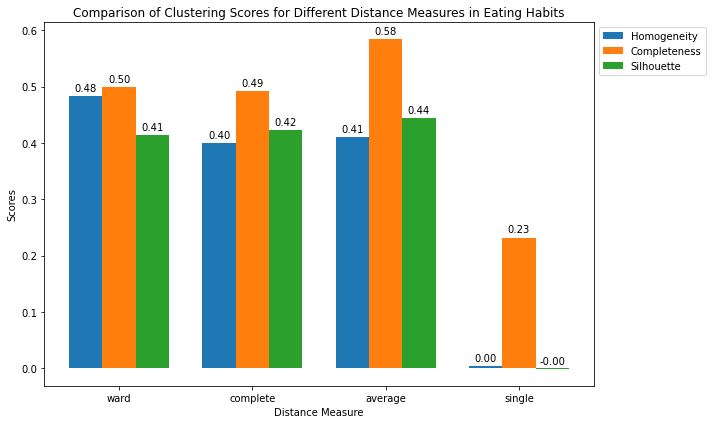

In [39]:
# testing the distance metrics on eating habits agg cluster model 7 clusters
true_labels = eating_hab['NObeyesdad']

distance_metrics = ['ward', 'complete', 'average', 'single']
scores_homogeneity = []
scores_completeness = []
scores_silhouette = []


for metric in distance_metrics:
    agg_clustering = AgglomerativeClustering(n_clusters=7, linkage=metric)
    cluster_labels = agg_clustering.fit_predict(unsup_eating_hab)
    
    homogeneity = homogeneity_score(true_labels, cluster_labels)
    completeness = completeness_score(true_labels, cluster_labels)
    silhouette = silhouette_score(unsup_eating_hab, cluster_labels)

    scores_homogeneity.append(homogeneity)
    scores_completeness.append(completeness)
    scores_silhouette.append(silhouette)


scores = np.array([scores_homogeneity, scores_completeness, scores_silhouette])

labels = distance_metrics
x = np.arange(len(labels)) 
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, scores[0], width, label='Homogeneity')
rects2 = ax.bar(x, scores[1], width, label='Completeness')
rects3 = ax.bar(x + width, scores[2], width, label='Silhouette')

ax.set_xlabel('Distance Measure')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Clustering Scores for Different Distance Measures in Eating Habits')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig(f'{folder_path}eating_hab_hcs_scores.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

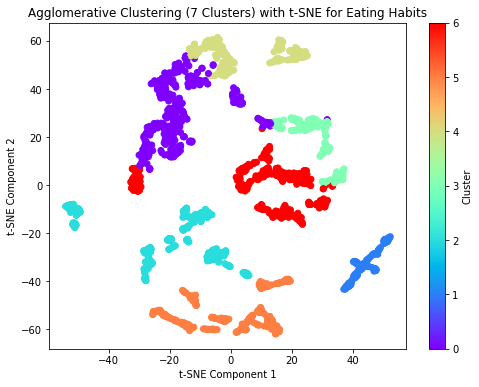

Cluster Sizes:
 0    455
6    408
2    338
5    336
4    241
3    193
1    140
Name: Cluster, dtype: int64

Cluster Means:
            Gender        Age    Height      Weight  \
Cluster                                              
0        0.439560  22.012945  1.660747   63.091451   
1        0.021429  20.597714  1.756000  136.974857   
2        0.748521  26.379024  1.720000  103.224408   
3        0.466321  36.647254  1.679067   82.371347   
4        0.190871  19.757344  1.638465   47.468672   
5        0.687500  26.365387  1.758750  116.565357   
6        0.600490  21.605221  1.714240   82.124020   

         family_history_with_overweight      FAVC      FCVC       NCP  \
Cluster                                                                 
0                              0.652747  0.764835  2.334453  2.727275   
1                              1.000000  1.000000  2.992857  2.985714   
2                              0.988166  0.976331  2.477501  2.595178   
3                       

In [58]:
# creating and visualising the agglomerative model for eating habs
from sklearn.manifold import TSNE 

agg_clustering_c7 = AgglomerativeClustering(n_clusters=7, linkage='ward')

cluster_labels = agg_clustering_c7.fit_predict(unsup_eating_hab)

unsup_eating_hab['Cluster'] = cluster_labels

tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(unsup_eating_hab.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Agglomerative Clustering (7 Clusters) with t-SNE for Eating Habits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')

plt.savefig(f'{folder_path}eating_hab_agg_clust.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()

cluster_sizes = unsup_eating_hab['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

cluster_means = unsup_eating_hab.groupby('Cluster').mean()
print("\nCluster Means:\n", cluster_means)

cluster_std = unsup_eating_hab.groupby('Cluster').std()
print("\nCluster Standard Deviations:\n", cluster_std)

cluster_min = unsup_eating_hab.groupby('Cluster').min()
cluster_max = unsup_eating_hab.groupby('Cluster').max()
print("\nCluster Min Values:\n", cluster_min)
print("\nCluster Max Values:\n", cluster_max)

print("\nFirst few rows with assigned clusters:\n", unsup_eating_hab.head())

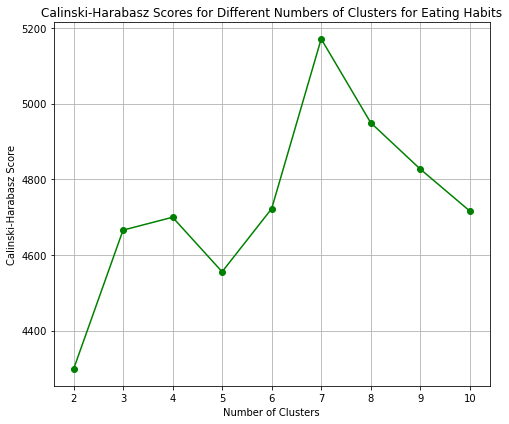

Optimal number of clusters based on Calinski-Harabasz Score: 7


In [74]:
# checking number of clusters for K-means eating habits
calinski_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(unsup_eating_hab)
    
    # Calinski-Harabasz score
    ch_score = calinski_harabasz_score(unsup_eating_hab, cluster_labels)
    calinski_scores.append(ch_score)

plt.figure(figsize=(7, 6))

plt.plot(range(2, 11), calinski_scores, marker='o', color='g')
plt.title('Calinski-Harabasz Scores for Different Numbers of Clusters for Eating Habits')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.savefig(f'{folder_path}eating_hab_K_ch_score.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

# Find the optimal number of clusters based on the Calinski-Harabasz score
optimal_clusters_ch = range(2, 11)[calinski_scores.index(max(calinski_scores))]
print(f"Optimal number of clusters based on Calinski-Harabasz Score: {optimal_clusters_ch}")

Cluster Sizes:
{0: 429, 1: 347, 2: 326, 3: 353, 4: 156, 5: 181, 6: 319}

Homogeneity Score:  0.4743323816340511
Completeness Score:  0.48577037571696174


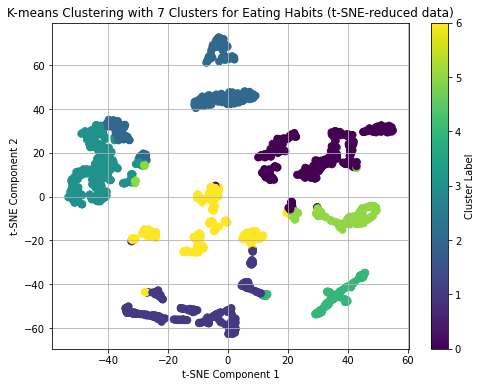

In [59]:
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(unsup_eating_hab)

kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(unsup_eating_hab)

print("Cluster Sizes:")
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(cluster_sizes)


try:
    homogeneity = homogeneity_score(true_labels, cluster_labels)
    completeness = completeness_score(true_labels, cluster_labels)

    print("\nHomogeneity Score: ", homogeneity)
    print("Completeness Score: ", completeness)
except NameError:
    print("\nHomogeneity and Completeness Scores: True labels are not available, skipping these metrics.")
    
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50)
plt.title('K-means Clustering with 7 Clusters for Eating Habits (t-SNE-reduced data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.savefig(f'{folder_path}eating_hab_K_visualised.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()

In [49]:
sup_eating_hab = eating_hab

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = sup_eating_hab.drop(columns=['NObeyesdad'])
y = sup_eating_hab['NObeyesdad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

Mean Squared Error: 0.1978
R-squared: 0.9512
Mean Absolute Error: 0.3398


In [52]:
# linear model is good and mostly accurate, can we find another better model using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = sup_eating_hab.drop(columns=['NObeyesdad'])
y = sup_eating_hab['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9369


Accuracy: 0.9369

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.83      0.92      0.87        93
           2       0.88      0.83      0.85        88
           3       0.94      0.94      0.94        79
           4       0.98      0.93      0.95       102
           5       0.97      0.99      0.98        88
           6       1.00      0.99      0.99        98

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634


Confusion Matrix:
[[82  4  0  0  0  0  0]
 [ 2 86  5  0  0  0  0]
 [ 0 11 73  4  0  0  0]
 [ 0  2  3 74  0  0  0]
 [ 0  1  2  1 95  3  0]
 [ 0  0  0  0  1 87  0]
 [ 0  0  0  0  1  0 97]]


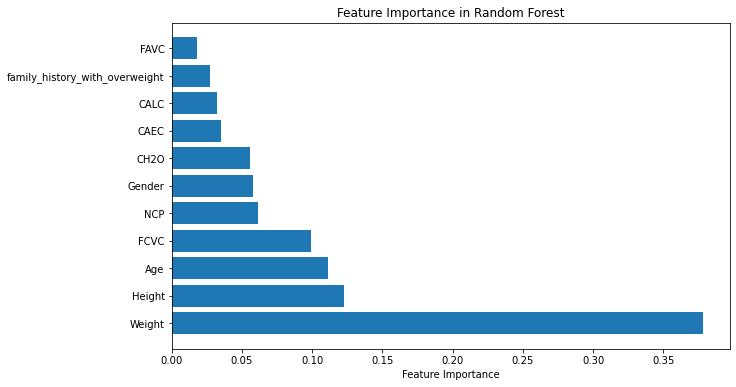

In [88]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = sup_eating_hab.drop(columns=['NObeyesdad'])
y = sup_eating_hab['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importances = rf_classifier.feature_importances_

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")

plt.savefig(f'{folder_path}eating_hab_feat_import.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()

In [53]:
unsup_lifestyle = lifestyle.drop(columns=['NObeyesdad'])

unsup_lifestyle[['Age', 'Height', 'Weight']] = unsup_eating_hab[['Age', 'Height', 'Weight']].round(2)

unsup_lifestyle.head()

,Gender,Age,Height,Weight,family_history_with_overweight,SMOKE,SCC,FAF,TUE,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,0,0.0,1.0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,1,1,3.0,0.0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,0,2.0,1.0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,0,2.0,0.0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,0,0.0,0.0,0,0,0,1,0


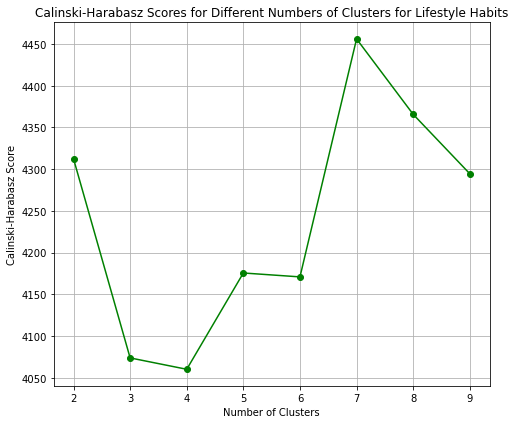

In [78]:
# deciding the number of clusters for lifestyle agglomerative clustering
calinski_scores = []

for n_clusters in range(2, 10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(unsup_lifestyle)
    
    ch_score = calinski_harabasz_score(unsup_lifestyle, cluster_labels)
    calinski_scores.append(ch_score)

plt.figure(figsize=(7, 6))
plt.plot(range(2, 10), calinski_scores, marker='o', color='g')
plt.title('Calinski-Harabasz Scores for Different Numbers of Clusters for Lifestyle Habits')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.savefig(f'{folder_path}lifestyle_ch_score_agg_cluster.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

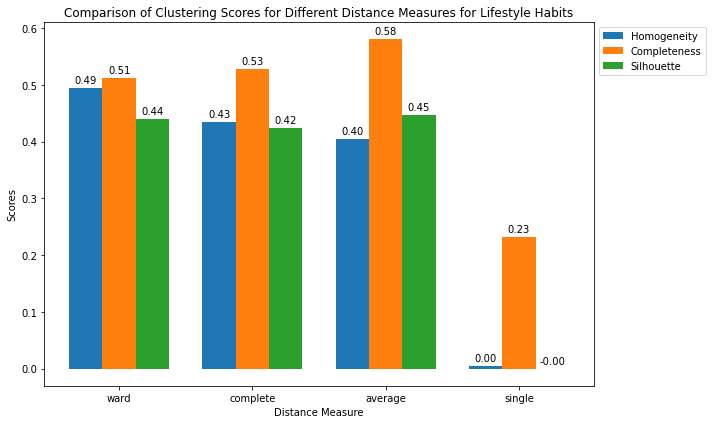

In [75]:
# testing which linkage method will work best
true_labels = lifestyle['NObeyesdad']

scores_homogeneity = []
scores_completeness = []
scores_silhouette = []


for metric in distance_metrics:
    agg_clustering = AgglomerativeClustering(n_clusters=7, linkage=metric)
    cluster_labels = agg_clustering.fit_predict(unsup_lifestyle)
    
    homogeneity = homogeneity_score(true_labels, cluster_labels)
    completeness = completeness_score(true_labels, cluster_labels)
    silhouette = silhouette_score(unsup_lifestyle, cluster_labels)

    scores_homogeneity.append(homogeneity)
    scores_completeness.append(completeness)
    scores_silhouette.append(silhouette)

scores = np.array([scores_homogeneity, scores_completeness, scores_silhouette])

labels = distance_metrics
x = np.arange(len(labels))
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, scores[0], width, label='Homogeneity')
rects2 = ax.bar(x, scores[1], width, label='Completeness')
rects3 = ax.bar(x + width, scores[2], width, label='Silhouette')

ax.set_xlabel('Distance Measure')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Clustering Scores for Different Distance Measures for Lifestyle Habits')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig(f'{folder_path}lifestyle_chs_scores_agg_cluster.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.tight_layout()
plt.show()

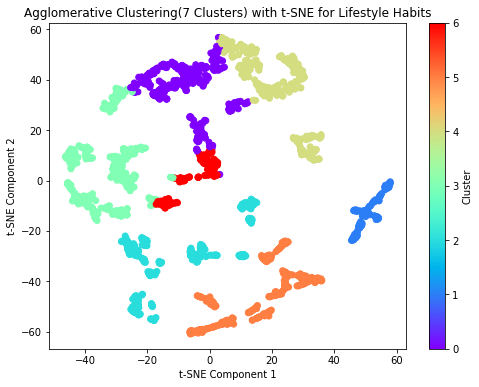

Cluster Sizes:
 3    424
4    370
0    362
2    337
5    336
6    142
1    140
Name: Cluster, dtype: int64

Cluster Means:
            Gender        Age    Height      Weight  \
Cluster                                              
0        0.381215  24.427790  1.646326   66.733591   
1        0.021429  20.597714  1.756000  136.974857   
2        0.747774  26.389080  1.719733  103.259614   
3        0.610849  21.806085  1.716321   82.229599   
4        0.302703  19.506486  1.659432   50.638865   
5        0.687500  26.365387  1.758750  116.565357   
6        0.514085  37.902887  1.676831   83.682394   

         family_history_with_overweight     SMOKE       SCC       FAF  \
Cluster                                                                 
0                              0.668508  0.030387  0.110497  0.960482   
1                              1.000000  0.000000  0.000000  1.425391   
2                              0.988131  0.011869  0.000000  0.903435   
3                       

In [89]:
# agglomerative clustering for lifestyle including visualisation
agg_clustering_c7l = AgglomerativeClustering(n_clusters=7, linkage='ward')

cluster_labels = agg_clustering_c7l.fit_predict(unsup_lifestyle)

unsup_lifestyle['Cluster'] = cluster_labels

tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(unsup_lifestyle.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Agglomerative Clustering(7 Clusters) with t-SNE for Lifestyle Habits')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')

plt.savefig(f'{folder_path}lifestyle_agg_cluster.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()

cluster_sizes = unsup_lifestyle['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

cluster_means = unsup_lifestyle.groupby('Cluster').mean()
print("\nCluster Means:\n", cluster_means)

cluster_std = unsup_lifestyle.groupby('Cluster').std()
print("\nCluster Standard Deviations:\n", cluster_std)

cluster_min = unsup_lifestyle.groupby('Cluster').min()
cluster_max = unsup_lifestyle.groupby('Cluster').max()
print("\nCluster Min Values:\n", cluster_min)
print("\nCluster Max Values:\n", cluster_max)

print("\nFirst few rows with assigned clusters:\n", unsup_lifestyle.head())

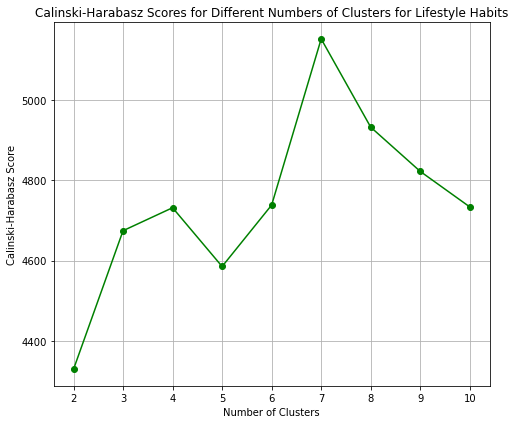

Optimal number of clusters based on Calinski-Harabasz Score: 7


In [79]:
# optimal number of clusters for K-means lifestyle
calinski_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(unsup_lifestyle)
    ch_score = calinski_harabasz_score(unsup_lifestyle, cluster_labels)
    calinski_scores.append(ch_score)

plt.figure(figsize=(7, 6))
plt.plot(range(2, 11), calinski_scores, marker='o', color='g')
plt.title('Calinski-Harabasz Scores for Different Numbers of Clusters for Lifestyle Habits')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.tight_layout()
plt.savefig(f'{folder_path}lifestyle_Kmeans_chscore.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')
plt.show()


optimal_clusters_ch = range(2, 11)[calinski_scores.index(max(calinski_scores))]

print(f"Optimal number of clusters based on Calinski-Harabasz Score: {optimal_clusters_ch}")

Cluster Sizes:
{0: 347, 1: 429, 2: 341, 3: 315, 4: 177, 5: 156, 6: 346}

Homogeneity Score:  0.4782464719706275
Completeness Score:  0.4900680413755399


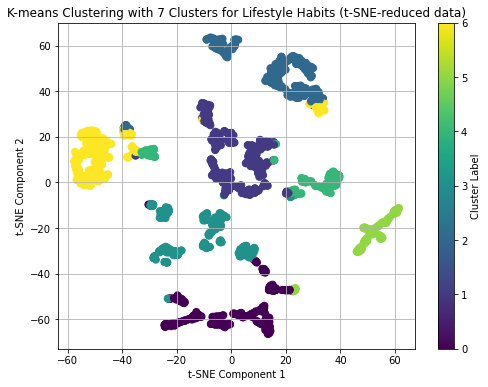

In [77]:
# performing K-means clustering and visualising
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(unsup_lifestyle)

kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(unsup_lifestyle)

print("Cluster Sizes:")
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(cluster_sizes)

try:
    homogeneity = homogeneity_score(true_labels, cluster_labels)
    completeness = completeness_score(true_labels, cluster_labels)

    print("\nHomogeneity Score: ", homogeneity)
    print("Completeness Score: ", completeness)
except NameError:
    print("\nHomogeneity and Completeness Scores: True labels are not available, skipping these metrics.")
    
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50)
plt.title('K-means Clustering with 7 Clusters for Lifestyle Habits (t-SNE-reduced data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

plt.savefig(f'{folder_path}lifestyle_Kmeans.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()

In [69]:
sup_lifestyle = lifestyle

In [83]:
# linear regression model for lifestyle habits
X = sup_lifestyle.drop(columns=['NObeyesdad'])
y = sup_lifestyle['NObeyesdad']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

Mean Squared Error: 0.2005
R-squared: 0.9505
Mean Absolute Error: 0.3427


Accuracy: 0.9432

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        86
         1.0       0.86      0.89      0.87        93
         2.0       0.90      0.88      0.89        88
         3.0       0.95      0.92      0.94        79
         4.0       0.97      0.97      0.97       102
         5.0       0.97      0.98      0.97        88
         6.0       1.00      0.99      0.99        98

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634


Confusion Matrix:
[[83  3  0  0  0  0  0]
 [ 3 83  6  1  0  0  0]
 [ 0  8 77  3  0  0  0]
 [ 0  3  3 73  0  0  0]
 [ 0  0  0  0 99  3  0]
 [ 0  0  0  0  2 86  0]
 [ 0  0  0  0  1  0 97]]


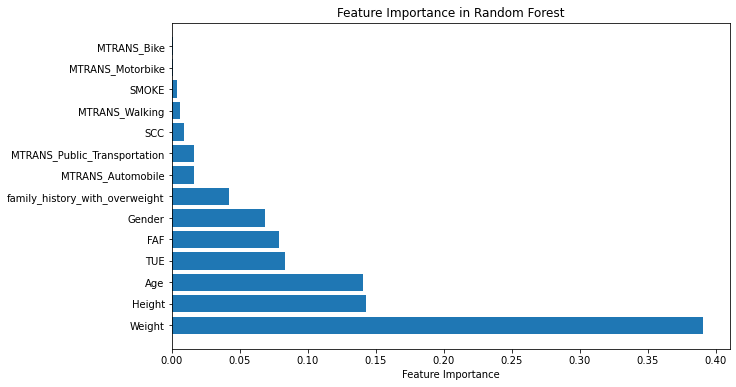

In [86]:
# random forest for lifestyle habits
X = sup_lifestyle.drop(columns=['NObeyesdad'])
y = sup_lifestyle['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importances = rf_classifier.feature_importances_

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")

plt.savefig(f'{folder_path}lifestyle_feat_import.png', format='png', pil_kwargs={'quality': 95}, bbox_inches='tight')

plt.show()